In [3]:
%reload_ext autoreload
%autoreload 2

from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
    add_new_deep_sup,
    custom_plots,
    compress_repeated_epochs
)
from ripple_heterogeneity.readout import assembly_multi_region, assembly_multi_region_member_ratemap_corr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import os
import nelpy as nel
from statannot import add_stat_annotation
from statannotations.Annotator import Annotator
import glob
import pickle
import itertools
from ripple_heterogeneity.place_cells import maps
from scipy import stats

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## locate sessions that were ran with assembly_multi_region

In [4]:
save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\assembly_multi_region_50ms_dt_10ms_z_dt"
sessions = glob.glob(save_path + os.sep + "*.pkl")
sessions_df = pd.DataFrame()
sessions_df["basepath"] = sessions

In [5]:
sessions_df

,basepath
0,Z:\home\ryanh\projects\ripple_heterogeneity\as...
1,Z:\home\ryanh\projects\ripple_heterogeneity\as...
2,Z:\home\ryanh\projects\ripple_heterogeneity\as...
3,Z:\home\ryanh\projects\ripple_heterogeneity\as...
4,Z:\home\ryanh\projects\ripple_heterogeneity\as...
...,...
113,Z:\home\ryanh\projects\ripple_heterogeneity\as...
114,Z:\home\ryanh\projects\ripple_heterogeneity\as...
115,Z:\home\ryanh\projects\ripple_heterogeneity\as...
116,Z:\home\ryanh\projects\ripple_heterogeneity\as...


In [ ]:
# assembly_multi_region_member_ratemap_corr.run(
#     r"Z:\home\ryanh\projects\ripple_heterogeneity\assembly_multi_region_50ms_dt_10ms_z_dt\Z__Data_Kenji_ec014.427_456.pkl"
# )


In [66]:
save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\assembly_multi_region_member_ratemap_corr_v4"

batch_analysis.run(
    sessions_df,
    save_path,
    assembly_multi_region_member_ratemap_corr.run,
    parallel=False,
    skip_if_error=False,
    verbose=False,
)

label_df = assembly_multi_region_member_ratemap_corr.load_results(save_path)

100%|██████████| 118/118 [00:11<00:00, 10.72it/s]


In [67]:
label_df["cross_label"] = label_df.deepSuperficial_ref + "_" + label_df.brainRegion_tar
label_df.loc[(label_df.is_member_sig_ref == True) & (label_df.is_member_sig_tar == True), "ismembers"] = "members"
label_df.loc[(label_df.is_member_sig_ref == False) | (label_df.is_member_sig_tar == False), "ismembers"] = "nonmembers"

label_df

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_info_tar,spatial_sparsity_ref,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,cross_label,ismembers
0,0.0,16.0,59.0,87.0,CA1,MEC,Deep,unknown,False,False,...,3.885635,25.029567,513.386668,2.856798,0.102836,2315.0,66.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers
1,0.0,17.0,59.0,89.0,CA1,MEC,Deep,unknown,False,False,...,4.015705,25.029567,321.883478,2.856798,0.402561,2315.0,90.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers
2,0.0,18.0,59.0,90.0,CA1,MEC,Deep,unknown,False,False,...,3.162141,25.029567,46.115906,2.856798,1.672382,2315.0,692.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers
3,0.0,19.0,59.0,91.0,CA1,MEC,Deep,unknown,False,False,...,5.008917,25.029567,1263.084566,2.856798,0.123189,2315.0,29.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers
4,0.0,20.0,59.0,92.0,CA1,MEC,Deep,unknown,False,False,...,3.205392,25.029567,59.650511,2.856798,1.120881,2315.0,455.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715418,56.0,32.0,75.0,40.0,CA1,PFC,Deep,unknown,False,False,...,1.254223,16.714412,0.405608,1.669819,14.307801,347.0,16016.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers
1715419,57.0,32.0,78.0,40.0,CA1,PFC,Deep,unknown,True,False,...,1.254223,2.245284,0.405608,7.739809,14.307801,3195.0,16016.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers
1715420,58.0,32.0,81.0,40.0,CA1,PFC,Deep,unknown,False,False,...,1.254223,24.840702,0.405608,1.615155,14.307801,224.0,16016.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers
1715421,59.0,32.0,84.0,40.0,CA1,PFC,Deep,unknown,False,False,...,1.254223,10.593165,0.405608,1.818480,14.307801,698.0,16016.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers


In [ ]:
label_df.query("ismembers=='members'").basepath.value_counts()

In [36]:
label_df.keys()

Index(['idx_ref', 'idx_tar', 'UID_ref', 'UID_tar', 'brainRegion_ref',
       'brainRegion_tar', 'deepSuperficial_ref', 'deepSuperficial_tar',
       'is_member_sig_ref', 'is_member_sig_tar', 'assembly_n', 'spatial_corr',
       'spatial_info_ref', 'spatial_info_tar', 'spatial_sparsity_ref',
       'spatial_sparsity_tar', 'peak_rate_ref', 'peak_rate_tar',
       'n_spikes_ref', 'n_spikes_tar', 'basepath', 'cross_label', 'ismembers'],
      dtype='object')

<AxesSubplot:xlabel='peak_rate_ref', ylabel='spatial_info_ref'>

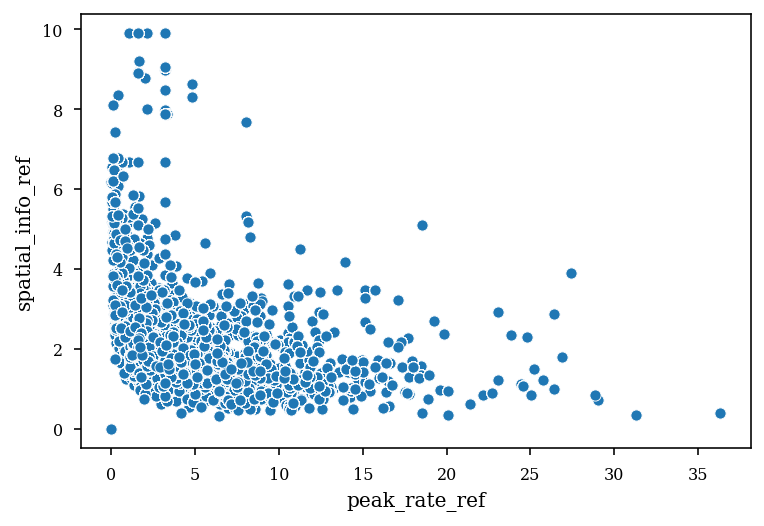

In [78]:
sns.scatterplot(data=label_df, x="peak_rate_ref",y="spatial_info_ref")

In [69]:
label_df.query("ismembers == 'members' & cross_label == 'Superficial_MEC' & n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2").head(10)

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_info_tar,spatial_sparsity_ref,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,cross_label,ismembers
39613,48.0,52.0,72.0,101.0,CA1,MEC,Superficial,unknown,True,True,...,0.384644,0.256474,0.420361,20.109009,11.054615,13009.0,5148.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,members
39622,48.0,61.0,72.0,111.0,CA1,MEC,Superficial,unknown,True,True,...,0.438069,0.256474,0.563398,20.109009,6.435479,13009.0,4637.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,members
39625,48.0,64.0,72.0,114.0,CA1,MEC,Superficial,unknown,True,True,...,0.904617,0.256474,3.575986,20.109009,2.521163,13009.0,476.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,members
39657,48.0,96.0,72.0,149.0,CA1,MEC,Superficial,unknown,True,True,...,1.033590,0.256474,3.293249,20.109009,3.622947,13009.0,637.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,members
39658,48.0,97.0,72.0,151.0,CA1,MEC,Superficial,unknown,True,True,...,0.688407,0.256474,2.333315,20.109009,3.292318,13009.0,1062.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,members
39678,48.0,117.0,72.0,176.0,CA1,MEC,Superficial,unknown,True,True,...,0.797792,0.256474,1.534032,20.109009,4.255509,13009.0,1957.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,members
870562,151.0,307.0,296.0,526.0,CA1,MEC,Superficial,unknown,True,True,...,1.543306,5.435052,1.840206,2.095586,5.136987,2362.0,5389.0,Z:\Data\HMC1\day13,Superficial_MEC,members
897271,246.0,277.0,420.0,464.0,CA1,MEC,Superficial,unknown,True,True,...,1.468115,0.911970,0.890059,10.018307,15.340209,9906.0,12234.0,Z:\Data\HMC1\day13,Superficial_MEC,members
1301877,93.0,150.0,150.0,216.0,CA1,MEC,Superficial,unknown,True,True,...,1.189114,7.324945,1.277648,3.333636,6.352611,889.0,3798.0,Z:\Data\HMC1\day14,Superficial_MEC,members
1301893,93.0,166.0,150.0,240.0,CA1,MEC,Superficial,unknown,True,True,...,1.110939,7.324945,0.427608,3.333636,15.795777,889.0,13480.0,Z:\Data\HMC1\day14,Superficial_MEC,members


In [115]:
basepath = "Z:\Data\AYAold\AYA9\day12"
label_df.query("basepath == @basepath & ismembers == 'members'")[["UID_ref","UID_tar","ismembers","assembly_n"]]

,UID_ref,UID_tar,ismembers,assembly_n
39139,57.0,101.0,members,2.0
39148,57.0,111.0,members,2.0
39151,57.0,114.0,members,2.0
39158,57.0,122.0,members,2.0
39183,57.0,149.0,members,2.0
39184,57.0,151.0,members,2.0
39192,57.0,160.0,members,2.0
39204,57.0,176.0,members,2.0
39218,58.0,101.0,members,2.0
39227,58.0,111.0,members,2.0


In [143]:
current_members_df.idx_ref.unique()
current_nonmembers_df.shape

(38831, 25)

In [151]:
basepath = "Z:\Data\AYAold\AYA9\day12"
current_members_df = label_df[(label_df.basepath == basepath) & (label_df.ismembers == 'members')]
current_nonmembers_df = label_df[(label_df.basepath == basepath) & (label_df.ismembers == 'nonmembers')]

idx = (np.in1d(current_nonmembers_df.idx_ref,current_members_df.idx_ref) & np.in1d(current_nonmembers_df.idx_tar,current_members_df.idx_tar))

current_nonmembers_df.loc[idx,"spatial_corr"] = np.nan

label_df.loc[(label_df.basepath == basepath) & (label_df.ismembers == 'nonmembers'),"spatial_corr"] = current_nonmembers_df.spatial_corr.values

In [161]:
current_members_df

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,cross_label,ismembers,cross_region_member_label,constant
1712855,41.0,4.0,54.0,8.0,CA1,PFC,Deep,unknown,True,True,...,0.472351,3.450484,14.649821,1479.0,14376.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,members,Deep_PFC_members,1
1712859,45.0,4.0,58.0,8.0,CA1,PFC,Deep,unknown,True,True,...,0.472351,8.089087,14.649821,2423.0,14376.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,members,Deep_PFC_members,1
1712868,54.0,4.0,72.0,8.0,CA1,PFC,Deep,unknown,True,True,...,0.472351,15.713666,14.649821,6970.0,14376.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,members,Deep_PFC_members,1


In [163]:
current_nonmembers_df.spatial_corr.unique()

(894,)

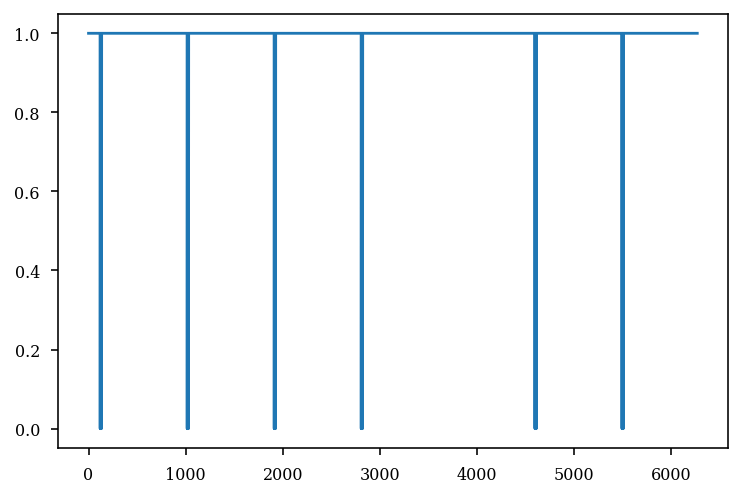

In [170]:
current_nonmembers_df
plt.plot(np.in1d(current_nonmembers_df.spatial_corr,current_nonmembers_df.spatial_corr.unique()))

In [160]:

current_nonmembers_df[np.isnan(current_nonmembers_df.spatial_corr)]

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,cross_label,ismembers,cross_region_member_label,constant
1709271,41.0,4.0,54.0,8.0,CA1,PFC,Deep,unknown,False,False,...,0.472351,3.450484,14.649821,1479.0,14376.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers,Deep_PFC_nonmembers,1
1709275,45.0,4.0,58.0,8.0,CA1,PFC,Deep,unknown,False,False,...,0.472351,8.089087,14.649821,2423.0,14376.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers,Deep_PFC_nonmembers,1
1709284,54.0,4.0,72.0,8.0,CA1,PFC,Deep,unknown,False,False,...,0.472351,15.713666,14.649821,6970.0,14376.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers,Deep_PFC_nonmembers,1
1710167,41.0,4.0,54.0,8.0,CA1,PFC,Deep,unknown,False,False,...,0.472351,3.450484,14.649821,1479.0,14376.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers,Deep_PFC_nonmembers,1
1710171,45.0,4.0,58.0,8.0,CA1,PFC,Deep,unknown,False,False,...,0.472351,8.089087,14.649821,2423.0,14376.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers,Deep_PFC_nonmembers,1
1710180,54.0,4.0,72.0,8.0,CA1,PFC,Deep,unknown,False,False,...,0.472351,15.713666,14.649821,6970.0,14376.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers,Deep_PFC_nonmembers,1
1711063,41.0,4.0,54.0,8.0,CA1,PFC,Deep,unknown,False,False,...,0.472351,3.450484,14.649821,1479.0,14376.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers,Deep_PFC_nonmembers,1
1711067,45.0,4.0,58.0,8.0,CA1,PFC,Deep,unknown,False,False,...,0.472351,8.089087,14.649821,2423.0,14376.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers,Deep_PFC_nonmembers,1
1711076,54.0,4.0,72.0,8.0,CA1,PFC,Deep,unknown,False,False,...,0.472351,15.713666,14.649821,6970.0,14376.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers,Deep_PFC_nonmembers,1
1711959,41.0,4.0,54.0,8.0,CA1,PFC,Deep,unknown,False,False,...,0.472351,3.450484,14.649821,1479.0,14376.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers,Deep_PFC_nonmembers,1


## remove non members correlations if the pair was members in another assembly

In [153]:
for basepath in label_df.basepath.unique():
    current_members_df = label_df[
        (label_df.basepath == basepath) & (label_df.ismembers == "members")
    ]
    current_nonmembers_df = label_df[
        (label_df.basepath == basepath) & (label_df.ismembers == "nonmembers")
    ]
    # locate the index of members pairs within other assemblies in which they were not members
    idx = np.in1d(current_nonmembers_df.idx_ref, current_members_df.idx_ref) & np.in1d(
        current_nonmembers_df.idx_tar, current_members_df.idx_tar
    )
    current_nonmembers_df.loc[idx, "spatial_corr"] = np.nan

    label_df.loc[
        (label_df.basepath == basepath) & (label_df.ismembers == "nonmembers"),
        "spatial_corr",
    ] = current_nonmembers_df.spatial_corr.values


In [157]:
test_df = label_df.query("ismembers=='members'")[["basepath","UID_ref","UID_tar","assembly_n","ismembers"]].value_counts().reset_index().sort_values(["basepath","assembly_n"])
test_df
# test_df.query("basepath == 'Z:\Data\FujisawaS\EE\EE0705fm'")

,basepath,UID_ref,UID_tar,assembly_n,ismembers,0
371,Z:\Data\AYAold\AYA7\day20,80.0,162.0,4.0,members,1
372,Z:\Data\AYAold\AYA7\day20,80.0,140.0,4.0,members,1
373,Z:\Data\AYAold\AYA7\day20,80.0,137.0,4.0,members,1
0,Z:\Data\AYAold\AYA7\day20,67.0,130.0,6.0,members,1
137,Z:\Data\AYAold\AYA7\day20,68.0,130.0,6.0,members,1
...,...,...,...,...,...,...
178,Z:\Data\ORproject\OR18\day2,33.0,15.0,0.0,members,1
179,Z:\Data\ORproject\OR18\day2,26.0,15.0,0.0,members,1
174,Z:\Data\ORproject\OR18\day3,58.0,8.0,4.0,members,1
175,Z:\Data\ORproject\OR18\day3,54.0,8.0,4.0,members,1


In [176]:
idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2 & ismembers == 'nonmembers'"

label_df.query(idx)

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,cross_label,ismembers,cross_region_member_label,constant
5,0.0,21.0,59.0,93.0,CA1,MEC,Deep,unknown,False,False,...,26.301623,2.856798,6.933978,2315.0,1022.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers,Deep_MEC_nonmembers,1
15,1.0,21.0,60.0,93.0,CA1,MEC,Deep,unknown,False,False,...,26.301623,3.219395,6.933978,1539.0,1022.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers,Deep_MEC_nonmembers,1
25,2.0,21.0,62.0,93.0,CA1,MEC,Deep,unknown,False,False,...,26.301623,7.601137,6.933978,11021.0,1022.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers,Deep_MEC_nonmembers,1
35,3.0,21.0,64.0,93.0,CA1,MEC,Deep,unknown,False,False,...,26.301623,5.200578,6.933978,5392.0,1022.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers,Deep_MEC_nonmembers,1
45,4.0,21.0,65.0,93.0,CA1,MEC,Deep,unknown,True,False,...,26.301623,4.768410,6.933978,3706.0,1022.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers,Deep_MEC_nonmembers,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715414,52.0,32.0,65.0,40.0,CA1,PFC,Deep,unknown,False,False,...,0.405608,5.695461,14.307801,2884.0,16016.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers,Deep_PFC_nonmembers,1
1715415,53.0,32.0,71.0,40.0,CA1,PFC,Superficial,unknown,False,False,...,0.405608,3.233021,14.307801,490.0,16016.0,Z:\Data\ORproject\OR18\day3,Superficial_PFC,nonmembers,Superficial_PFC_nonmembers,1
1715416,54.0,32.0,72.0,40.0,CA1,PFC,Deep,unknown,False,False,...,0.405608,15.713666,14.307801,6970.0,16016.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers,Deep_PFC_nonmembers,1
1715417,55.0,32.0,73.0,40.0,CA1,PFC,Deep,unknown,False,False,...,0.405608,6.282047,14.307801,1945.0,16016.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers,Deep_PFC_nonmembers,1


In [179]:
label_df

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,cross_label,ismembers,cross_region_member_label,constant
0,0.0,16.0,59.0,87.0,CA1,MEC,Deep,unknown,False,False,...,513.386668,2.856798,0.102836,2315.0,66.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers,Deep_MEC_nonmembers,1
1,0.0,17.0,59.0,89.0,CA1,MEC,Deep,unknown,False,False,...,321.883478,2.856798,0.402561,2315.0,90.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers,Deep_MEC_nonmembers,1
2,0.0,18.0,59.0,90.0,CA1,MEC,Deep,unknown,False,False,...,46.115906,2.856798,1.672382,2315.0,692.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers,Deep_MEC_nonmembers,1
3,0.0,19.0,59.0,91.0,CA1,MEC,Deep,unknown,False,False,...,1263.084566,2.856798,0.123189,2315.0,29.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers,Deep_MEC_nonmembers,1
4,0.0,20.0,59.0,92.0,CA1,MEC,Deep,unknown,False,False,...,59.650511,2.856798,1.120881,2315.0,455.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers,Deep_MEC_nonmembers,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715418,56.0,32.0,75.0,40.0,CA1,PFC,Deep,unknown,False,False,...,0.405608,1.669819,14.307801,347.0,16016.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers,Deep_PFC_nonmembers,1
1715419,57.0,32.0,78.0,40.0,CA1,PFC,Deep,unknown,True,False,...,0.405608,7.739809,14.307801,3195.0,16016.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers,Deep_PFC_nonmembers,1
1715420,58.0,32.0,81.0,40.0,CA1,PFC,Deep,unknown,False,False,...,0.405608,1.615155,14.307801,224.0,16016.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers,Deep_PFC_nonmembers,1
1715421,59.0,32.0,84.0,40.0,CA1,PFC,Deep,unknown,False,False,...,0.405608,1.818480,14.307801,698.0,16016.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers,Deep_PFC_nonmembers,1


In [178]:
label_df.drop_duplicates(subset=["spatial_corr"])

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,cross_label,ismembers,cross_region_member_label,constant
0,0.0,16.0,59.0,87.0,CA1,MEC,Deep,unknown,False,False,...,513.386668,2.856798,0.102836,2315.0,66.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers,Deep_MEC_nonmembers,1
1,0.0,17.0,59.0,89.0,CA1,MEC,Deep,unknown,False,False,...,321.883478,2.856798,0.402561,2315.0,90.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers,Deep_MEC_nonmembers,1
2,0.0,18.0,59.0,90.0,CA1,MEC,Deep,unknown,False,False,...,46.115906,2.856798,1.672382,2315.0,692.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers,Deep_MEC_nonmembers,1
3,0.0,19.0,59.0,91.0,CA1,MEC,Deep,unknown,False,False,...,1263.084566,2.856798,0.123189,2315.0,29.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers,Deep_MEC_nonmembers,1
4,0.0,20.0,59.0,92.0,CA1,MEC,Deep,unknown,False,False,...,59.650511,2.856798,1.120881,2315.0,455.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers,Deep_MEC_nonmembers,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710045,59.0,32.0,84.0,40.0,CA1,PFC,Deep,unknown,False,False,...,0.405608,1.818480,14.307801,698.0,16016.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers,Deep_PFC_nonmembers,1
1710046,60.0,32.0,85.0,40.0,CA1,PFC,Deep,unknown,False,False,...,0.405608,1.690222,14.307801,380.0,16016.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers,Deep_PFC_nonmembers,1
1712855,41.0,4.0,54.0,8.0,CA1,PFC,Deep,unknown,True,True,...,0.472351,3.450484,14.649821,1479.0,14376.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,members,Deep_PFC_members,1
1712859,45.0,4.0,58.0,8.0,CA1,PFC,Deep,unknown,True,True,...,0.472351,8.089087,14.649821,2423.0,14376.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,members,Deep_PFC_members,1


In [182]:
label_df.ismembers.value_counts()


nonmembers    1714877
members           546
Name: ismembers, dtype: int64

In [185]:
label_df.drop_duplicates(subset=["idx_ref","idx_tar","spatial_corr"]).ismembers.value_counts()


nonmembers    105225
members          540
Name: ismembers, dtype: int64

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Superficial_MEC_nonmembers vs. Superficial_MEC_members: Mann-Whitney-Wilcoxon test two-sided, P_val:1.165e-02 U_stat=1.355e+05
Deep_MEC_nonmembers vs. Deep_MEC_members: Mann-Whitney-Wilcoxon test two-sided, P_val:1.150e-06 U_stat=3.335e+05
Superficial_PFC_nonmembers vs. Superficial_PFC_members: Mann-Whitney-Wilcoxon test two-sided, P_val:1.587e-04 U_stat=4.534e+05
Deep_PFC_nonmembers vs. Deep_PFC_members: Mann-Whitney-Wilcoxon test two-sided, P_val:7.783e-14 U_stat=1.399e+06
Deep_MEC_members vs. Superficial_MEC_members: Mann-Whitney-Wilcoxon test two-sided, P_val:4.335e-01 U_stat=2.221e+03
Superficial_PFC_members vs. Deep_PFC_members: Mann-Whitney-Wilcoxon test two-sided, P_val:1.102e-01 U_stat=6.335e+03


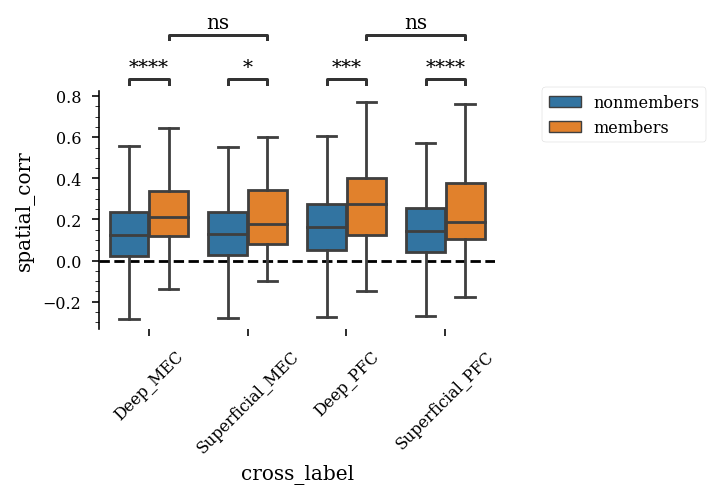

In [188]:
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=.6, subplots=(1, 1)), edgecolor=None
)
# drop duplicates
label_df_subset = label_df.drop_duplicates(subset=["idx_ref","idx_tar","spatial_corr"])

idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2"
sns.boxplot(
    data=label_df_subset.query(idx),
    y="spatial_corr",
    x="cross_label",
    order=["Deep_MEC", "Superficial_MEC", "Deep_PFC", "Superficial_PFC"],
    hue="ismembers",
    showfliers=False,
)
# sns.stripplot(data=label_df.query(idx),y="spatial_corr",x="cross_label",hue="ismembers",dodge=True,color="k",size=5)
sns.despine(bottom=True)
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.axhline(0, color="k", linestyle="--", zorder=-1000)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xticks(rotation=45)

box_pairs = [
    (("Deep_MEC", "members"), ("Deep_MEC", "nonmembers")),
    (("Superficial_MEC", "members"), ("Superficial_MEC", "nonmembers")),
    (("Superficial_PFC", "members"), ("Superficial_PFC", "nonmembers")),
    (("Deep_PFC", "members"), ("Deep_PFC", "nonmembers")),
    (("Deep_MEC", "members"), ("Superficial_MEC", "members")),
    (("Deep_PFC", "members"), ("Superficial_PFC", "members")),

]
annotator = Annotator(
    plt.gca(),
    box_pairs,
    data=label_df_subset.query(idx),
    x="cross_label",
    y="spatial_corr",
    hue="ismembers",
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()

plt.savefig(
    os.path.join(fig_save_path, "ratemap_corr_cross_region_assemblies.svg"),
    dpi=300,
    bbox_inches="tight",
)

In [222]:
idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2 & cross_label == 'Deep_MEC'"
label_df_subset.query(idx)

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,cross_label,ismembers,cross_region_member_label,constant
5,0.0,21.0,59.0,93.0,CA1,MEC,Deep,unknown,False,False,...,26.301623,2.856798,6.933978,2315.0,1022.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers,Deep_MEC_nonmembers,1
15,1.0,21.0,60.0,93.0,CA1,MEC,Deep,unknown,False,False,...,26.301623,3.219395,6.933978,1539.0,1022.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers,Deep_MEC_nonmembers,1
25,2.0,21.0,62.0,93.0,CA1,MEC,Deep,unknown,False,False,...,26.301623,7.601137,6.933978,11021.0,1022.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers,Deep_MEC_nonmembers,1
35,3.0,21.0,64.0,93.0,CA1,MEC,Deep,unknown,False,False,...,26.301623,5.200578,6.933978,5392.0,1022.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers,Deep_MEC_nonmembers,1
45,4.0,21.0,65.0,93.0,CA1,MEC,Deep,unknown,True,False,...,26.301623,4.768410,6.933978,3706.0,1022.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers,Deep_MEC_nonmembers,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701616,7.0,74.0,13.0,96.0,CA1,MEC,Deep,unknown,False,False,...,1.214207,3.557717,6.630170,2203.0,5755.0,Z:\Data\Kenji\ec016.577_590,Deep_MEC,nonmembers,Deep_MEC_nonmembers,1
1701617,7.0,75.0,13.0,100.0,CA1,MEC,Deep,unknown,False,False,...,1.345040,3.557717,4.254496,2203.0,5670.0,Z:\Data\Kenji\ec016.577_590,Deep_MEC,nonmembers,Deep_MEC_nonmembers,1
1701618,7.0,76.0,13.0,101.0,CA1,MEC,Deep,unknown,False,False,...,0.135517,3.557717,16.030728,2203.0,50335.0,Z:\Data\Kenji\ec016.577_590,Deep_MEC,nonmembers,Deep_MEC_nonmembers,1
1701619,7.0,77.0,13.0,102.0,CA1,MEC,Deep,unknown,False,False,...,2.120530,3.557717,10.250640,2203.0,2872.0,Z:\Data\Kenji\ec016.577_590,Deep_MEC,nonmembers,Deep_MEC_nonmembers,1


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_nonmembers vs. 1_members: Mann-Whitney-Wilcoxon test two-sided, P_val:1.150e-06 U_stat=3.335e+05
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_nonmembers vs. 1_members: Mann-Whitney-Wilcoxon test two-sided, P_val:1.165e-02 U_stat=1.355e+05
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_nonmembers vs. 1_members: Mann-Whitney-Wilcoxon test two-sided, P_val:7.783e-14 U_stat=1.399e+06
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    

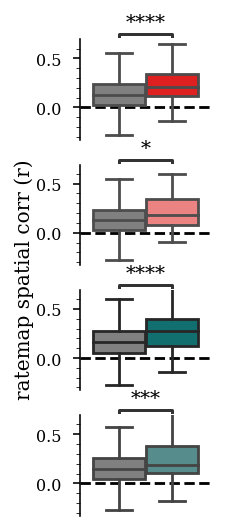

In [242]:
fig, axs = plt.subplots(4,1, figsize=functions.set_size('thesis', fraction=.2, subplots=(6, 1)), edgecolor=None, sharey=True)
fig.subplots_adjust(hspace = 0.25, wspace=.1)
axs = axs.ravel()


# drop duplicates
label_df_subset = label_df.drop_duplicates(subset=["idx_ref","idx_tar","spatial_corr"])

idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2 & cross_label == 'Deep_MEC'"
group_colors = {
    "nonmembers":"#808080",
    "members": "#de2020",
}
sns.set_palette(sns.color_palette(group_colors.values()))
sns.boxplot(
    data=label_df_subset.query(idx),
    y="spatial_corr",
    x="constant",
    hue="ismembers",
    hue_order=group_colors.keys(),
    showfliers=False,
    saturation=1,
    ax=axs[0]
)
box_pairs = [
    ((1, "members"), (1, "nonmembers")),
]
annotator = Annotator(
    axs[0],
    box_pairs,
    data=label_df_subset.query(idx),
    x="constant",
    y="spatial_corr",
    hue="ismembers",
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()


idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2 & cross_label == 'Superficial_MEC'"
group_colors = {
    "nonmembers":"#808080",
    "members": "#eb8383",
}
sns.set_palette(sns.color_palette(group_colors.values()))
sns.boxplot(
    data=label_df_subset.query(idx),
    y="spatial_corr",
    x="constant",
    hue="ismembers",
    showfliers=False,
    saturation=1,
    ax=axs[1]
)
box_pairs = [
    ((1, "members"), (1, "nonmembers")),
]
annotator = Annotator(
    axs[1],
    box_pairs,
    data=label_df_subset.query(idx),
    x="constant",
    y="spatial_corr",
    hue="ismembers",
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()


idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2 & cross_label == 'Deep_PFC'"
group_colors = {
    "nonmembers":"#808080",
    "members": "#116f70",
}
sns.set_palette(sns.color_palette(group_colors.values()))
sns.boxplot(
    data=label_df_subset.query(idx),
    y="spatial_corr",
    x="constant",
    hue="ismembers",
    showfliers=False,
    saturation=1,
    ax=axs[2]
)
box_pairs = [
    ((1, "members"), (1, "nonmembers")),
]
annotator = Annotator(
    axs[2],
    box_pairs,
    data=label_df_subset.query(idx),
    x="constant",
    y="spatial_corr",
    hue="ismembers",
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()


idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2 & cross_label == 'Superficial_PFC'"
group_colors = {
    "nonmembers":"#808080",
    "members": "#568c8c",
}
sns.set_palette(sns.color_palette(group_colors.values()))
sns.boxplot(
    data=label_df_subset.query(idx),
    y="spatial_corr",
    x="constant",
    hue="ismembers",
    showfliers=False,
    saturation=1,
    ax=axs[3]
)
box_pairs = [
    ((1, "members"), (1, "nonmembers")),
]
annotator = Annotator(
    axs[3],
    box_pairs,
    data=label_df_subset.query(idx),
    x="constant",
    y="spatial_corr",
    hue="ismembers",
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()

for i in range(4):
    axs[i].legend("",frameon=False)
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())
    axs[i].axhline(0, color="k", linestyle="--", zorder=-1000)
    axs[i].axes.get_xaxis().set_ticks([])

fig.text(-0.2, 0.5, 'ratemap spatial corr (r)', ha='center', va='center', rotation='vertical')

sns.despine(bottom=True)

plt.savefig(
    os.path.join(fig_save_path, "ratemap_corr_cross_region_assemblies_v2.svg"),
    dpi=300,
    bbox_inches="tight",
)

In [86]:
# group_colors = {
#     "Deep_MEC_members": "#de2020",
#     "Deep_MEC_nonmembers": "#de2020",

#     "Superficial_MEC": "#eb8383",
#     "Deep_PFC": "#116f70",
#     "Superficial_PFC": "#568c8c",
# }

# label_df["cross_region_member_label"] = label_df.cross_label + "_" + label_df.ismembers
# label_df["constant"] = 1
# idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2"

# sns.boxplot(data=label_df.query(idx),y="spatial_corr",x="constant",hue="cross_region_member_label")
# plt.legend(bbox_to_anchor=(1.1, 1.05))


<AxesSubplot:xlabel='cross_label', ylabel='spatial_corr'>

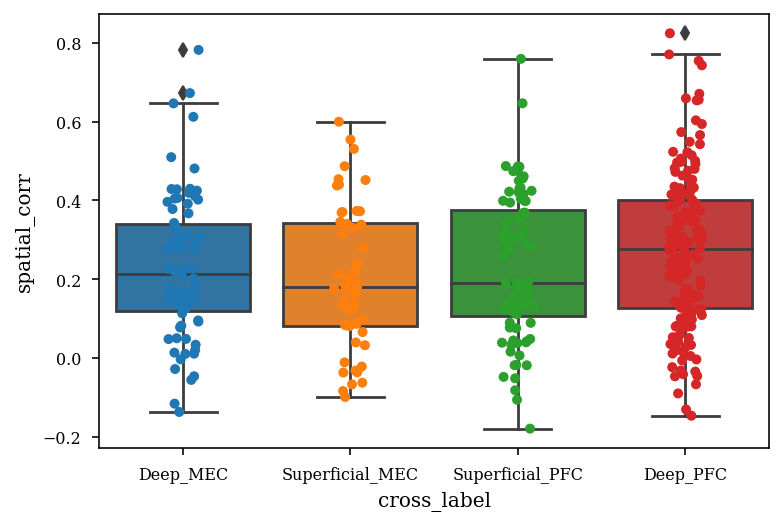

In [79]:
idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2 & ismembers=='members'"

sns.boxplot(data=label_df.query(idx),y="spatial_corr",x="cross_label")
sns.stripplot(data=label_df.query(idx),y="spatial_corr",x="cross_label")
